In [4]:
import torch 
import torch.nn as nn 
import numpy as np
import matplotlib.pyplot as plt 

import seaborn as sns 
sns.set()

In [7]:
high = 2*np.pi 
x = torch.unsqueeze(torch.linspace(-high, high, 20000), dim=1)
x = x[torch.randperm(x.shape[0])]

In [8]:
random_sin = np.random.uniform(low=-0.01, high=0.01, size = (x.shape[0], ))
random_cos = np.random.uniform(low=-0.01, high=0.01, size = (x.shape[0], ))

In [9]:
sin_y = (torch.sin(x[:,0]) + random_sin).reshape(-1, 1).double()
cos_y = (torch.cos(x[:,0]) + random_cos).reshape(-1, 1).double()

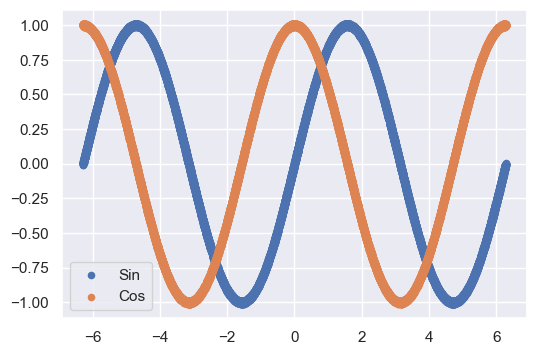

In [10]:
plt.figure(figsize=(6,4))
plt.scatter(x[:, 0].reshape(-1, 1), sin_y, s=20, label = "Sin")
plt.scatter(x[:, 0].reshape(-1, 1), cos_y, s=20, label = "Cos")
plt.legend()
plt.show()

In [11]:
class Net(nn.Module):
    def __init__(self, h):
        super(Net, self).__init__()

        self.model1 = torch.nn.Sequential(
            torch.nn.Linear(x.shape[1], h),
            torch.nn.ReLU(), 
            torch.nn.Linear(h, h),
            torch.nn.ReLU(),
            torch.nn.Linear(h, h),
            torch.nn.ReLU()
        )

        self.model_sin = torch.nn.Sequential(
            torch.nn.Linear(h, h),
            torch.nn.ReLU(),
            torch.nn.Linear(h, 1)
        )

        self.model_cos = torch.nn.Sequential(
            torch.nn.Linear(h, h),
            torch.nn.ReLU(),
            torch.nn.Linear(h, 1)
        )
    
    def forward(self, inputs):
        
        x1 = self.model1(inputs)
        output_sin = self.model_sin(x1).double()
        output_cos = self.model_cos(x1).double()

        return output_sin, output_cos


In [12]:
epochs = 100 
learning_rate = 0.01

In [13]:
net = Net(150)
losses = [] 
loss_func = torch.nn.MSELoss() 
optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)

for epoch in (range(epochs)):

    prediction = net(x)

    loss1 = loss_func(prediction[0], sin_y)
    loss2 = loss_func(prediction[1], cos_y)

    loss = loss1 + loss2 
    optimizer.zero_grad() 
    loss.backward() 
    optimizer.step() 

    losses.append(loss.item())

    if (epoch+1)%5==0:
        print("Epoch = ", epoch, "Loss = ", round(loss.item(), 3))

Epoch =  4 Loss =  0.917
Epoch =  9 Loss =  0.778
Epoch =  14 Loss =  0.417
Epoch =  19 Loss =  0.401
Epoch =  24 Loss =  0.164
Epoch =  29 Loss =  0.1
Epoch =  34 Loss =  0.063
Epoch =  39 Loss =  0.043
Epoch =  44 Loss =  0.023
Epoch =  49 Loss =  0.012
Epoch =  54 Loss =  0.007
Epoch =  59 Loss =  0.004
Epoch =  64 Loss =  0.004
Epoch =  69 Loss =  0.014
Epoch =  74 Loss =  0.025
Epoch =  79 Loss =  0.01
Epoch =  84 Loss =  0.007
Epoch =  89 Loss =  0.004
Epoch =  94 Loss =  0.002
Epoch =  99 Loss =  0.001


Text(0, 0.5, 'losses')

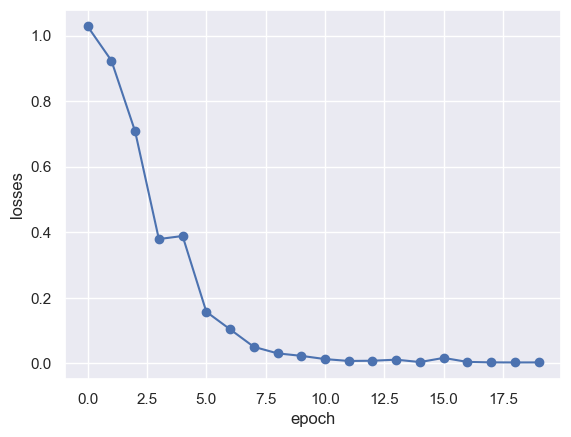

In [15]:
plt.plot(losses[::5], '-o')
plt.xlabel('epoch')
plt.ylabel('losses')